In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

 ## Общая информация 
 


In [34]:
df = pd.read_csv("lamoda_reviews.csv")
df.columns = ["Name", "Description", "Review", "Rating"]
initial_count = len(df)
df = df.drop_duplicates()
duplicates_count = initial_count - len(df)

print(f"Изначально отзывов: {initial_count}")
print(f"Найдено дубликатов: {duplicates_count}")
print(f"После удаления дубликатов: {len(df)}")

Изначально отзывов: 142111
Найдено дубликатов: 28330
После удаления дубликатов: 113781


У нас много дупликатов, но и отзывов под сотню, так что не переживаем. Пьем черничный латте.

## Базовая статистика

In [35]:
stats = {
    "Количество отзывов": len(df),
    "Средняя оценка": df["Rating"].mean(),
    "Медианная оценка": df["Rating"].median(),
    "Средняя длина отзыва (слов)": df["Review"].apply(lambda x: len(str(x).split())).mean()
}
for key, value in stats.items():
    print(f"{key}: {value}")

Количество отзывов: 113781
Средняя оценка: 4.761814362679182
Медианная оценка: 5.0
Средняя длина отзыва (слов): 8.426811154762218


## Распределение отзывов по звездам

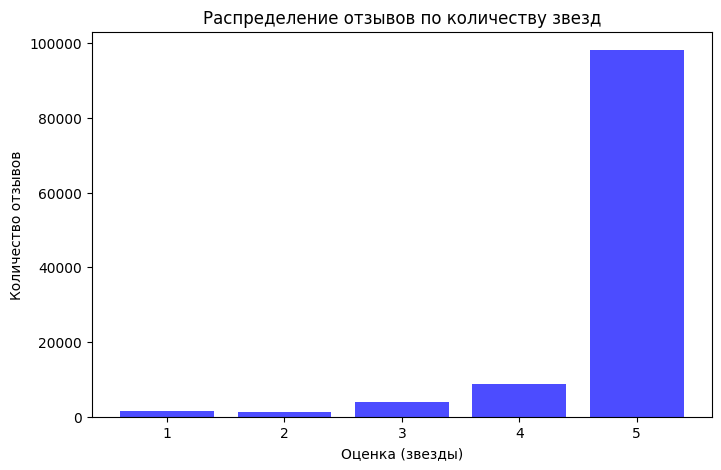

In [36]:
df["Word Count"] = df["Review"].str.split().str.len()
rating_counts = df["Rating"].value_counts().sort_index()

plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color='blue', alpha=0.7)
plt.xlabel("Оценка (звезды)")
plt.ylabel("Количество отзывов")
plt.title("Распределение отзывов по количеству звезд")
plt.xticks(rating_counts.index)

plt.show()


Все предсказуемо и логично, очень много 5-звездочных, остальных сильно меньше(

## Распределение числа слов 

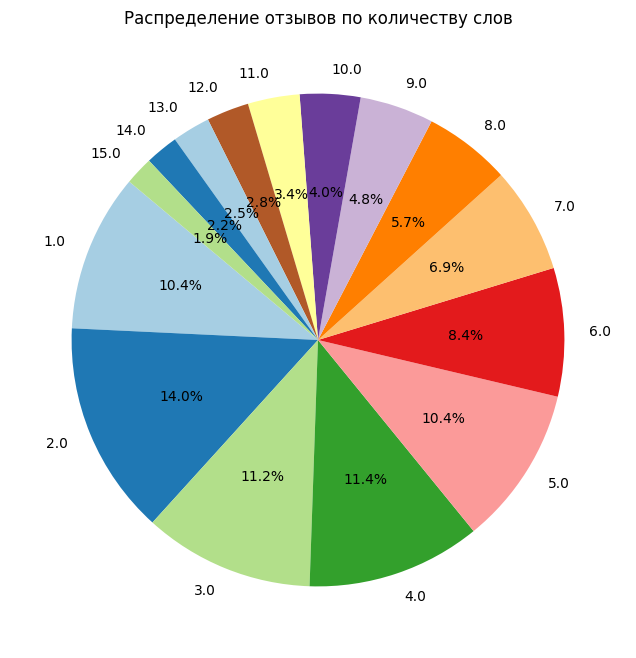

In [37]:
word_count_table = df["Word Count"].value_counts().sort_index().head(15) 

plt.figure(figsize=(8, 8))
plt.pie(word_count_table, labels=word_count_table.index, autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=140)
plt.title("Распределение отзывов по количеству слов")

plt.show()

## Самые частые словечки

In [38]:
from collections import Counter

all_words = " ".join(df["Review"].dropna()).lower().split()
word_counts = Counter(all_words)
common_words = pd.DataFrame(word_counts.most_common(20), columns=["Слово", "Частота"])
print(common_words.head(20))


       Слово  Частота
0         не    25874
1         на    25725
2          и    21867
3          в    21717
4      очень    20095
5         но    12205
6     размер    12031
7   качество    11379
8          ,     7943
9        как     6851
10         с     5990
11        по     5586
12       для     5454
13       что     5074
14       все     4980
15   хорошая     4495
16    хорошо     4399
17        за     4093
18         к     3821
19  отличная     3751


## Модное облако

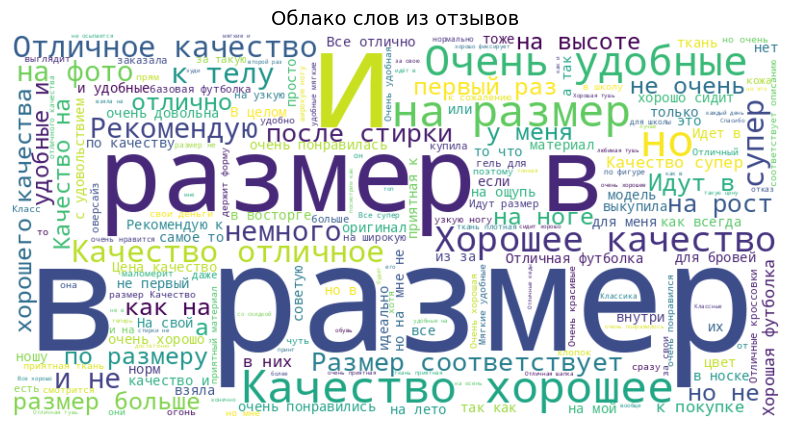

In [39]:
from wordcloud import WordCloud

text = " ".join(str(review) for review in df["Review"].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis", max_words=200).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")  # Убираем оси для красоты
plt.title("Облако слов из отзывов", fontsize=14)
plt.show()

## Частые фразы из 2-3 слов

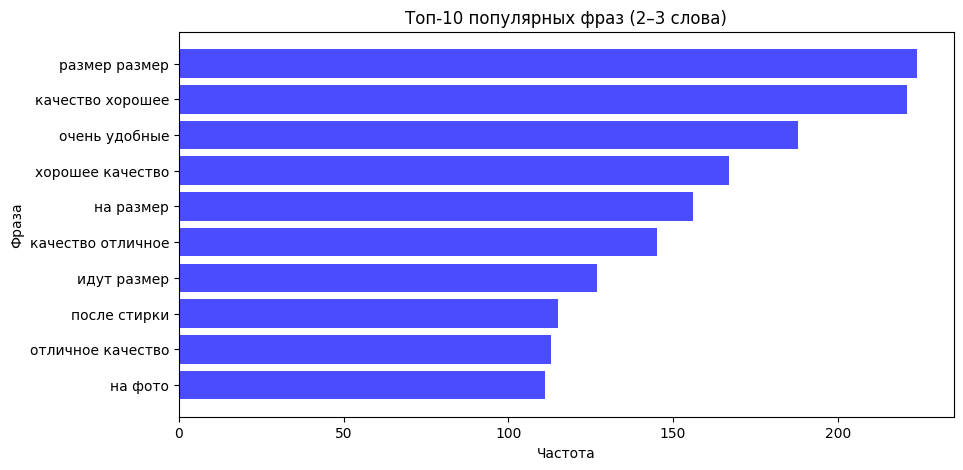

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

df_sample = df.sample(min(len(df), 10000), random_state=42)
vectorizer = CountVectorizer(ngram_range=(2, 3), stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df_sample["Review"])
phrases_freq = pd.DataFrame({
    "Фраза": vectorizer.get_feature_names_out(),
    "Частота": X.sum(axis=0).A1  # Используем .A1, чтобы избежать проблем с памятью
}).sort_values(by="Частота", ascending=False)
plt.figure(figsize=(10, 5))
plt.barh(phrases_freq["Фраза"][:10], phrases_freq["Частота"][:10], color="blue", alpha=0.7)
plt.xlabel("Частота")
plt.ylabel("Фраза")
plt.title("Топ-10 популярных фраз (2–3 слова)")
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшего отображения
plt.show()

## Базовые корреляции

Корреляция длины отзыва с оценкой: -0.1785


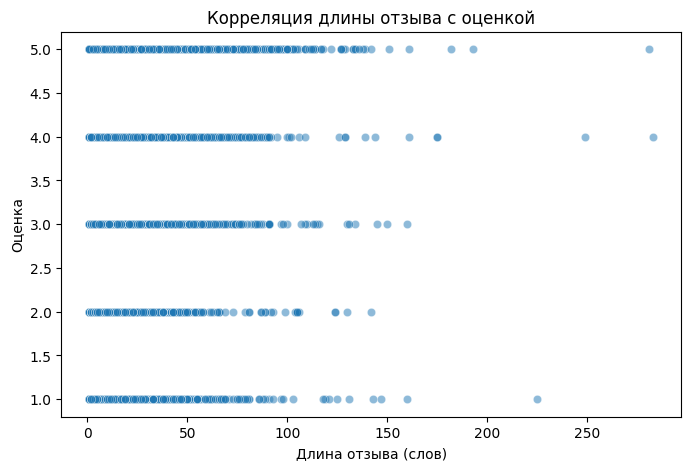

In [41]:
df = pd.read_csv("lamoda_reviews.csv")
df.columns = ["Name", "Description", "Review", "Rating"]

df = df.drop_duplicates()
df = df.dropna(subset=["Review", "Rating"])  

df["Review"] = df["Review"].astype(str)
df["Review_Length"] = df["Review"].apply(lambda x: len(x.split()))
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')

correlation = df["Review_Length"].corr(df["Rating"])
print(f"Корреляция длины отзыва с оценкой: {correlation:.4f}")

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Review_Length"], y=df["Rating"], alpha=0.5)
plt.xlabel("Длина отзыва (слов)")
plt.ylabel("Оценка")
plt.title("Корреляция длины отзыва с оценкой")
plt.show()

/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/2480067863.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Emojis"].fillna("", inplace=True)


Топ-10 корреляций с рейтингом:
тушь         0.014392
не           0.011886
шапка        0.011463
цвет         0.010895
что          0.008516
на           0.007947
удобные      0.007323
смотрится    0.006836
отличная     0.006694
кроссовки    0.006378
Name: Rating, dtype: float64


/var/folders/8_/2209xngj6qz3nh1thpv4hld80000gn/T/ipykernel_54096/2480067863.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=filtered_corr.head(10).index, y=filtered_corr.head(10).values, palette="coolwarm")


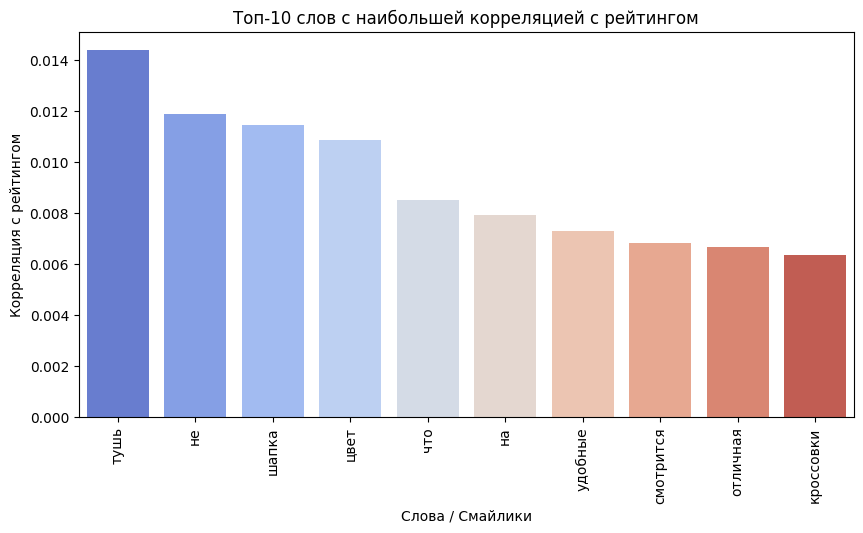

In [42]:
import emoji
import re


df = pd.read_csv("lamoda_reviews.csv")
df.columns = ["Name", "Description", "Review", "Rating"]
df = df.drop_duplicates()
df = df.dropna(subset=["Review", "Rating"])  
df["Review"] = df["Review"].astype(str)
df["Rating"] = pd.to_numeric(df["Rating"], errors='coerce')

def extract_emojis(text):
    return ''.join(c for c in text if c in emoji.EMOJI_DATA)

df["Emojis"] = df["Review"].apply(extract_emojis)
df["Emojis"].fillna("", inplace=True)
vectorizer = CountVectorizer(
    ngram_range=(1, 1),
    stop_words="english",
    max_features=50
)
X = vectorizer.fit_transform(df["Review"])
word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
df = pd.concat([df, word_freq_df], axis=1)
emoji_vectorizer = CountVectorizer(token_pattern=r".", max_features=20)
X_emoji = emoji_vectorizer.fit_transform(df["Emojis"].astype(str))
emoji_freq_df = pd.DataFrame(X_emoji.toarray(), columns=emoji_vectorizer.get_feature_names_out())
df = pd.concat([df, emoji_freq_df], axis=1)
df_numeric = df.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()["Rating"].dropna().sort_values(ascending=False)
corr_matrix = corr_matrix.drop("Rating", errors="ignore")
filtered_corr = corr_matrix[~corr_matrix.index.str.match(r"^[a-zA-Zа-яА-Я]$")]
print("Топ-10 корреляций с рейтингом:")
print(filtered_corr.head(10))
plt.figure(figsize=(10, 5))
sns.barplot(x=filtered_corr.head(10).index, y=filtered_corr.head(10).values, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Слова / Смайлики")
plt.ylabel("Корреляция с рейтингом")
plt.title("Топ-10 слов с наибольшей корреляцией с рейтингом")
plt.show()

## Выводы

В целом -- вообще ничего удивительного, кроме того что слово тушь имеет наибольшую корреляцию с рейтингом. Никогда бы не подумал что на моих данных это так. Длина отзыва также не особо влияет, да и конкретные слова на самом деле тоже. Кажется, в дальнейшем надо будет рассмотреть корреляции выражений с рейтингом и постараться найти другие связи, потому что у меня пока что ничего явного не вышло.
